In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [6]:
reviews_lv = pd.read_csv('reviews_lv.csv')
reviews_ph = pd.read_csv('reviews_ph.csv')
reviews_tr = pd.read_csv('reviews_tr.csv')
restaurants_lv = pd.read_csv('restaurants_lv.csv')
restaurantsonly = pd.read_csv('restaurantsonly.csv')

In [7]:
restaurantsonly

,Unnamed: 0,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,1,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
2,2,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,3,25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
4,4,30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63956,63956,209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'T...","Nightlife, Diners, Bars, Southern, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
63957,63957,209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Restaurants, Sandwiches, Food, Breakfast & Bru...","{'Monday': '5:30-15:0', 'Tuesday': '5:30-15:0'..."
63958,63958,209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
63959,63959,209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [8]:
restaurants_lv

,level_0,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6,36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147.0,36.099738,-115.301568,2.5,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN
1,9,42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118.0,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,22,86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
3,28,101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Fast Food, Restaurants",NaN
4,41,130,Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"7960 S Rainbow Blvd, Ste 8000A",Las Vegas,NV,89139.0,36.043663,-115.241881,4.0,82,0,"{'BusinessParking': ""{'garage': False, 'street...","Filipino, Restaurants, Breakfast & Brunch, Foo...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,63936,209317,tv-WIUQifcp5J9pUKoiE3Q,Dragon Grille,NaN,Las Vegas,NV,89119.0,36.076518,-115.153343,4.0,69,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Food, Asian Fusion, Food Trucks, Restaurants","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
6933,63937,209319,kGVAle6VpDvZHlEeTB2WhA,Deliria,"8480 S Las Vegas, Ste 110",Las Vegas,NV,89123.0,36.035739,-115.171471,4.0,10,0,"{'WiFi': ""u'no'"", 'RestaurantsTakeOut': 'True'...","Delis, Restaurants, Sandwiches, Food, Pizza",NaN
6934,63950,209367,aJK0MWXKgXIgQUCM9fqSJQ,The Original Graziano's Pizza Restaurant,8410 W Desert Inn Rd,Las Vegas,NV,89117.0,36.129782,-115.274674,3.5,69,0,"{'BusinessParking': ""{'garage': False, 'street...","Pizza, Italian, Restaurants","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
6935,63951,209369,5VXlHFrYZZzj7zfZEsz5nQ,Dragon Noodle Co.,3770 Las Vegas Blvd S,Las Vegas,NV,89109.0,36.105289,-115.174037,3.0,279,0,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."


# Number of businesses in each city:

<AxesSubplot:xlabel='city'>

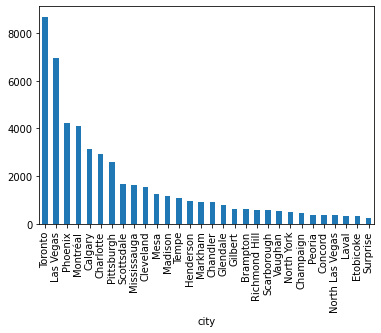

In [9]:
df_bus_groups = restaurantsonly.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

# Different Type of Businesses and their Count:

<AxesSubplot:>

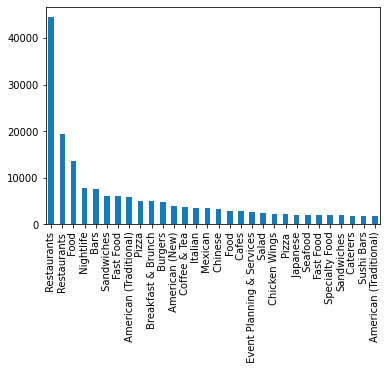

In [10]:

uniq_cat_dict = {}
for i in restaurantsonly.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')



# . Business and City Ordered pairs and their count:

<AxesSubplot:>

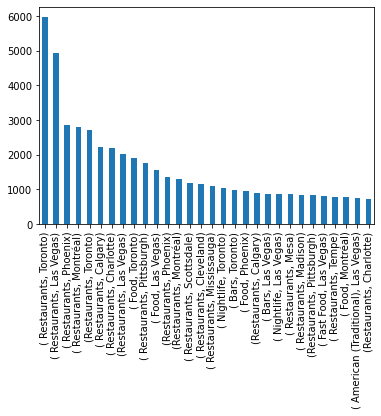

In [11]:


business_city = {}
n = len(restaurantsonly)
for i in range(n):
    k1 = str(restaurantsonly.categories.iloc[i]).split(',')
    k2 = restaurantsonly.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')



# Scatter plot for first two Latitude and Longitude

Text(0, 0.5, 'longitude')

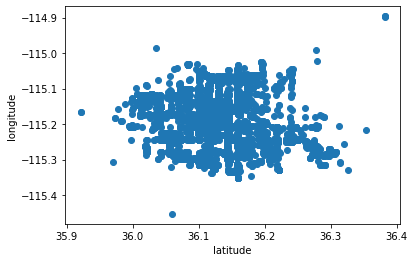

In [12]:


plt.scatter(restaurants_lv['latitude'],restaurants_lv['longitude'], label = 'Scatter plot for first two latitude and longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')



# Top 35 most common cities which business in the entries of yelp

<AxesSubplot:xlabel='city'>

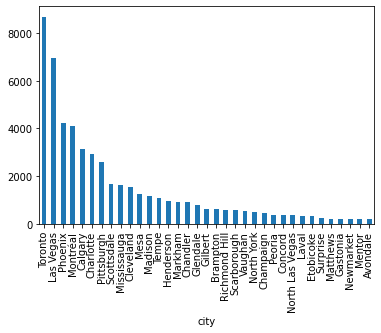

In [13]:


restaurantsonly.city.groupby(restaurantsonly.city).count().sort_values()[::-1][:35].plot(kind="bar")

